# **Importing Libraries**

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **Importing the Dataset into Pandas**

In [2]:
df = pd.read_csv('/content/Blinkit_Analytics.csv')


# **Exploring the Dataset**

1. Top 5 rows of the whole dataset

In [3]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,ticket_id_new,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,us_indicator,overpaid_ride_ticket,fraud_score
0,22,22,43863.15105,4.04,10.0,2839,700,1,client,finished,...,1376,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,43869.10161,6.09,3.6,5698,493,1,client,finished,...,2035,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,43869.49346,4.32,3.5,4426,695,1,client,finished,...,2222,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,43866.27424,72871.72,NaN,49748,1400,0,client,finished,...,1788,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,43874.73014,20032.50,19500.0,10273,5067,1,client,finished,...,2710,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


2. Information about the columns (Data-Type and Non-null value count)





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   order_try_id_new       4943 non-null   int64  
 2   calc_created           4943 non-null   float64
 3   metered_price          4923 non-null   float64
 4   upfront_price          3409 non-null   float64
 5   distance               4943 non-null   int64  
 6   duration               4943 non-null   int64  
 7   gps_confidence         4943 non-null   int64  
 8   entered_by             4943 non-null   object 
 9   b_state                4943 non-null   object 
 10  dest_change_number     4943 non-null   int64  
 11  prediction_price_type  4923 non-null   object 
 12  predicted_distance     4923 non-null   float64
 13  predicted_duration     4923 non-null   float64
 14  change_reason_pricing  298 non-null    object 
 15  tick

3. Column Names

In [5]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'rider_app_version', 'order_state', 'order_try_state',
       'driver_app_version', 'driver_device_uid_new', 'device_name',
       'us_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

4. Number of Columns and Rows present in the dataset.

In [6]:
df.shape

(4943, 25)

5. Identifying the null values present in the column

In [7]:
df.isnull().sum()

order_id_new                0
order_try_id_new            0
calc_created                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
entered_by                  0
b_state                     0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
change_reason_pricing    4645
ticket_id_new               0
rider_app_version          16
order_state                 0
order_try_state             0
driver_app_version          0
driver_device_uid_new       0
device_name                 0
us_indicator                0
overpaid_ride_ticket        0
fraud_score              2759
dtype: int64

# **Creating  a New Data Frame**
Since we do not require all the columns to analyze  this data and identify the top opportunities that can help us improve upfront pricing precision.

So we are creating the new data frame based upon the columns which will help us identify the in's and out's of *Upfront Price*.

In [8]:
df_required_columns = df[['order_id_new',
                         'metered_price',
                         'upfront_price',
                         'distance',
                         'duration',
                         'gps_confidence',
                         'dest_change_number',
                         'prediction_price_type',
                         'predicted_distance',
                         'predicted_duration',
                         'fraud_score']]

## **Exploring the new data frame**

1. Top 10 rows of the updated dataset

In [9]:
df_required_columns.head(10)

,order_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,fraud_score
0,22,4.04,10.0,2839,700,1,1,upfront,13384.0,1091.0,-1383.0
1,618,6.09,3.6,5698,493,1,1,upfront,2286.0,360.0,NaN
2,657,4.32,3.5,4426,695,1,1,upfront,4101.0,433.0,-166.0
3,313,72871.72,NaN,49748,1400,0,2,upfront_destination_changed,3017.0,600.0,NaN
4,1176,20032.50,19500.0,10273,5067,1,1,upfront,14236.0,2778.0,NaN
5,1209,6.11,6.3,4924,513,1,1,upfront,4882.0,562.0,NaN
6,761,20753.20,10500.0,10459,1874,1,1,upfront,4892.0,698.0,NaN
7,1662,2.61,6.5,2020,412,1,1,upfront,8545.0,888.0,-2350.0
8,1904,13600.50,NaN,9540,1917,1,1,prediction,11018.0,1914.0,NaN
9,1999,4.14,2.5,3845,720,1,1,upfront,1883.0,298.0,-5181.0


2. Information about the columns (Data-Type and Non-null value count)


In [10]:
df_required_columns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4943 entries, 0 to 4942
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id_new           4943 non-null   int64  
 1   metered_price          4923 non-null   float64
 2   upfront_price          3409 non-null   float64
 3   distance               4943 non-null   int64  
 4   duration               4943 non-null   int64  
 5   gps_confidence         4943 non-null   int64  
 6   dest_change_number     4943 non-null   int64  
 7   prediction_price_type  4923 non-null   object 
 8   predicted_distance     4923 non-null   float64
 9   predicted_duration     4923 non-null   float64
 10  fraud_score            2184 non-null   float64
dtypes: float64(5), int64(5), object(1)
memory usage: 424.9+ KB


3. Identifying the null values present in the column

In [11]:
df_required_columns.isnull().sum()

order_id_new                0
metered_price              20
upfront_price            1534
distance                    0
duration                    0
gps_confidence              0
dest_change_number          0
prediction_price_type      20
predicted_distance         20
predicted_duration         20
fraud_score              2759
dtype: int64

# Dealing with the Null Values

### ***Column Name : Metered Price***

#####**Code to display the null values in metered_price column**

In [12]:
df_required_columns[df_required_columns['metered_price'].isnull()]


,order_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,fraud_score
64,217,NaN,NaN,6249,2477,1,1,NaN,NaN,NaN,NaN
393,3066,NaN,NaN,5483,917,1,1,NaN,NaN,NaN,NaN
458,3320,NaN,NaN,3364,323,0,1,NaN,NaN,NaN,NaN
513,1166,NaN,NaN,21997,1742,1,1,NaN,NaN,NaN,-74.0
779,1759,NaN,NaN,10309,849,1,1,NaN,NaN,NaN,NaN
998,861,NaN,NaN,1424,416,1,1,NaN,NaN,NaN,NaN
1206,1349,NaN,NaN,11206,1268,1,1,NaN,NaN,NaN,-1270.0
1287,2012,NaN,NaN,3717,713,1,1,NaN,NaN,NaN,NaN
1340,1112,NaN,NaN,4114,528,1,1,NaN,NaN,NaN,NaN
1582,460,NaN,NaN,6718,764,1,1,NaN,NaN,NaN,NaN


#####**Code to delete the null values in metered_price column**

In [13]:
df_required_columns = df_required_columns.dropna(subset=['metered_price'])


In [14]:
df_required_columns.isnull().sum()

order_id_new                0
metered_price               0
upfront_price            1514
distance                    0
duration                    0
gps_confidence              0
dest_change_number          0
prediction_price_type       0
predicted_distance          0
predicted_duration          0
fraud_score              2741
dtype: int64

### ***Column Name : Fraud Score***

#####**Code to display the null values in fraud score column**

In [15]:
df_required_columns[df_required_columns['fraud_score'].isnull()]

,order_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,fraud_score
1,618,6.09,3.6,5698,493,1,1,upfront,2286.0,360.0,NaN
3,313,72871.72,NaN,49748,1400,0,2,upfront_destination_changed,3017.0,600.0,NaN
4,1176,20032.50,19500.0,10273,5067,1,1,upfront,14236.0,2778.0,NaN
5,1209,6.11,6.3,4924,513,1,1,upfront,4882.0,562.0,NaN
6,761,20753.20,10500.0,10459,1874,1,1,upfront,4892.0,698.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4930,4109,4.79,4.2,4566,860,1,1,upfront,4300.0,665.0,NaN
4934,3850,2.40,2.5,1815,334,1,1,upfront,1816.0,456.0,NaN
4935,465,6000.00,6000.0,1822,275,1,1,upfront,1756.0,344.0,NaN
4939,2192,8789.28,NaN,5712,1173,0,1,prediction,5712.0,1093.0,NaN


#####**Code to fill the null values in fraud_score column with integer 0**

In [16]:
df_required_columns['fraud_score'].fillna(0, inplace=True)


<ipython-input-16-6d1b72c11eb6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_required_columns['fraud_score'].fillna(0, inplace=True)


In [17]:
df_required_columns.isnull().sum()

order_id_new                0
metered_price               0
upfront_price            1514
distance                    0
duration                    0
gps_confidence              0
dest_change_number          0
prediction_price_type       0
predicted_distance          0
predicted_duration          0
fraud_score                 0
dtype: int64

### ***Column Name : Upfront Price***

##### **Dropping the null values for upfront price column**

In [ ]:
df_required_columns = df_required_columns.dropna(subset=['upfront_price'])

In [ ]:
df_required_columns.isnull().sum()

#####**Now, We will find the correlation of upfront_price column with other columns**

---



In [18]:
df_required_columns.corr()['upfront_price'].sort_values(ascending=False)


<ipython-input-18-ec542d0fef97>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_required_columns.corr()['upfront_price'].sort_values(ascending=False)


upfront_price         1.000000
predicted_duration    0.746837
predicted_distance    0.715542
metered_price         0.420772
duration              0.238937
distance              0.167040
fraud_score           0.089366
dest_change_number    0.051178
order_id_new         -0.192324
gps_confidence       -0.206987
Name: upfront_price, dtype: float64

In [21]:
df_required_columns.head()

,order_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,fraud_score
0,22,4.04,10.0,2839,700,1,1,upfront,13384.0,1091.0,-1383.0
1,618,6.09,3.6,5698,493,1,1,upfront,2286.0,360.0,0.0
2,657,4.32,3.5,4426,695,1,1,upfront,4101.0,433.0,-166.0
4,1176,20032.50,19500.0,10273,5067,1,1,upfront,14236.0,2778.0,0.0
5,1209,6.11,6.3,4924,513,1,1,upfront,4882.0,562.0,0.0


# **Analysing the dataframe**

### ***1. Analyzing Outliers***

<Axes: >

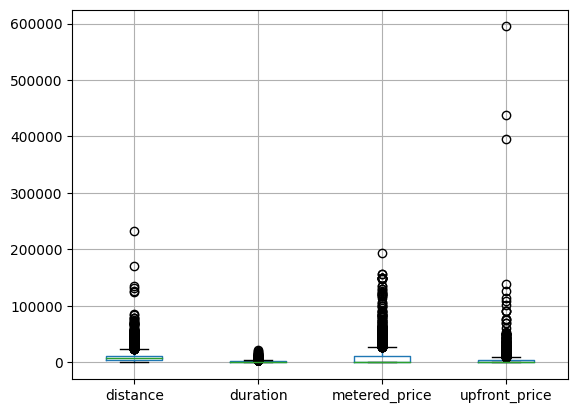

In [22]:
df.boxplot(column=['distance', 'duration', 'metered_price', 'upfront_price'])
# Handle outliers as needed (e.g., capping values)

### ***2. Difference between Metered Price and Upfront Price***

In [31]:
df['price_difference'] = abs(df['metered_price'] - df['upfront_price'])
df['price_difference']

0           5.96
1           2.49
2           0.82
3            NaN
4         532.50
          ...   
4938        2.81
4939         NaN
4940        0.10
4941        5.04
4942    13244.10
Name: price_difference, Length: 4943, dtype: float64

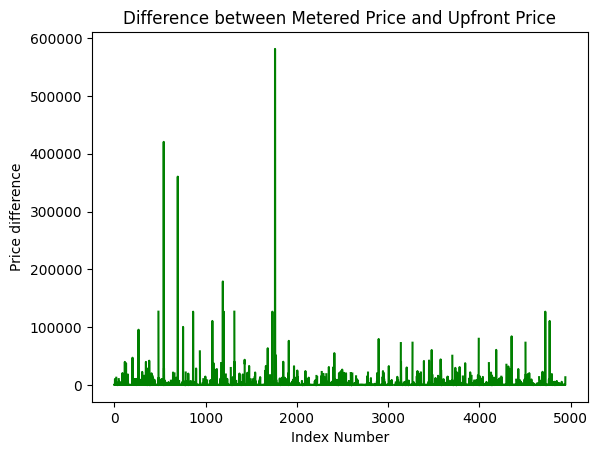

In [37]:
# Differences between prices
df['price_difference'] = abs(df['metered_price'] - df['upfront_price'])
df['price_difference'].plot(title='Difference between Metered Price and Upfront Price', color='green')
plt.xlabel('Index Number')
plt.ylabel('Price difference')
plt.show()

##### Adding price difference column to our dataframe

In [48]:
df_required_columns['price_difference'] = df_required_columns['metered_price'] - df_required_columns['upfront_price']


### ***3. Surprise Factor***

In [38]:
df_required_columns['Surprise_factor'] = np.where(
    (df_required_columns['metered_price'] >= 1.2 * df_required_columns['upfront_price']) |
    (df_required_columns['metered_price'] <= 0.8 * df_required_columns['upfront_price']),
    True, False)

In [49]:
df_required_columns.head()

,order_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,fraud_score,Surprise_factor,price_difference
0,22,4.04,10.0,2839,700,1,1,upfront,13384.0,1091.0,-1383.0,True,-5.96
1,618,6.09,3.6,5698,493,1,1,upfront,2286.0,360.0,0.0,True,2.49
2,657,4.32,3.5,4426,695,1,1,upfront,4101.0,433.0,-166.0,True,0.82
4,1176,20032.50,19500.0,10273,5067,1,1,upfront,14236.0,2778.0,0.0,False,532.50
5,1209,6.11,6.3,4924,513,1,1,upfront,4882.0,562.0,0.0,False,-0.19


<Axes: title={'center': 'Surprise factor'}>

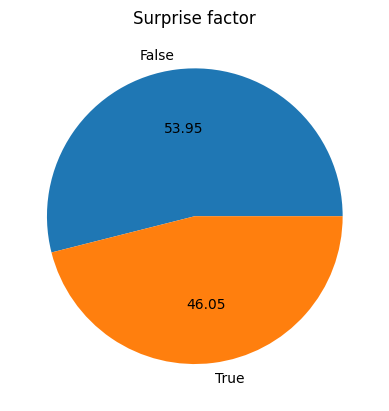

In [43]:
df_required_columns.groupby(by ='Surprise_factor').size().plot(kind ='pie', autopct='%.2f', title ='Surprise factor')

#####***Shows that 46.05% of cases are a surprise for customers as for these cases metered_price is 120% of the upfront_price or metered_price is 80% of the upfront_price***

### ***4. Analyzing relation between Actual Distance and Metered Price***

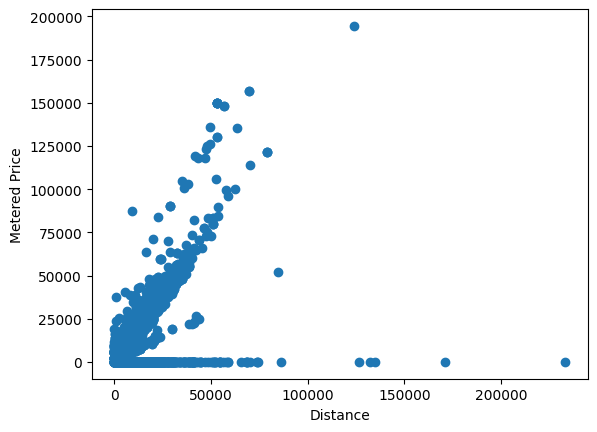

In [42]:
plt.scatter(df['distance'], df['metered_price'])
plt.xlabel('Distance')
plt.ylabel('Metered Price')
plt.show()


### ***5. Categorical breakdowns***

<Axes: title={'center': 'metered_price'}, xlabel='[gps_confidence]'>

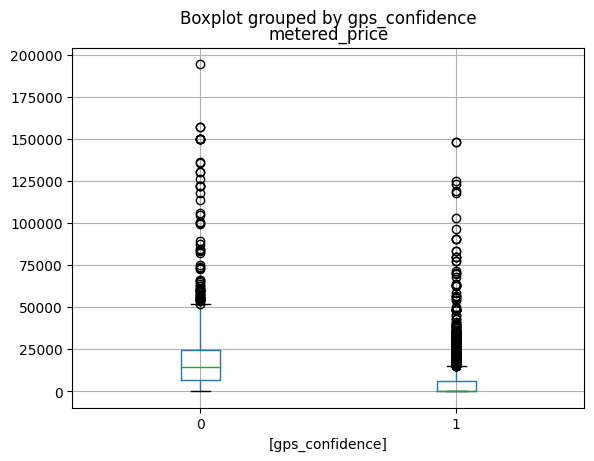

In [44]:
df.boxplot(column=['metered_price'], by=['gps_confidence'])

### ***6. Focus on Prediction Errors***



In [46]:
# Large errors
df_filtered = df[abs(df['price_difference'] / df['metered_price']) > 0.2]

# Analyzing common characteristics
df_filtered.describe()  # Statistics of rows with large errors
df_filtered.groupby('gps_confidence').size()  # Any patterns in GPS quality?
df_filtered.groupby('prediction_price_type').size()  # Which price type is more prone to error?


prediction_price_type
upfront    1360
dtype: int64

### ***7. Price Difference vs GPS Confidence***



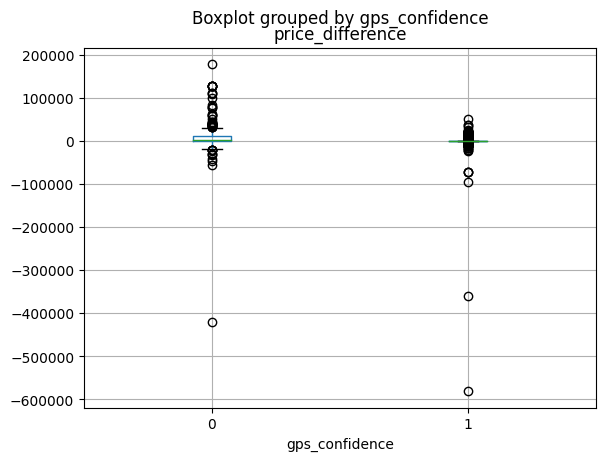

In [51]:
df_required_columns.boxplot(column='price_difference', by='gps_confidence')
plt.show()


### ***8. No. of destination changed vs Price Difference***



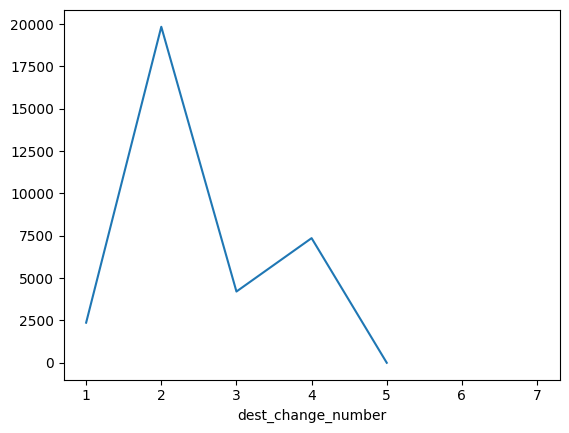

In [52]:
df.groupby('dest_change_number')['price_difference'].mean().plot()
plt.show()


### ***9. Pricing Errors vs GPS Signal Quality***



Analysis revealed that 19.9% of rides had low GPS confidence.


<Figure size 800x500 with 0 Axes>

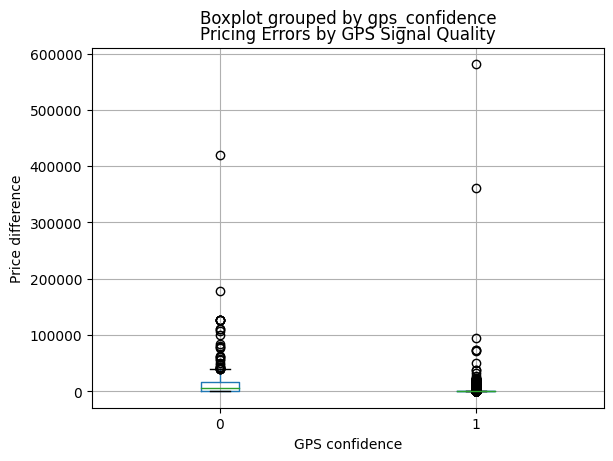

In [70]:
# First, we calculate percentage of rides with poor GPS
low_gps_rides = df[df['gps_confidence'] == 0]
percentage_low_gps = (len(low_gps_rides) / len(df)) * 100
print(f"Analysis revealed that {percentage_low_gps:.1f}% of rides had low GPS confidence.")

# Plotting the same:
plt.figure(figsize=(8, 5))
df.boxplot(column='price_difference', by='gps_confidence')
plt.title('Pricing Errors by GPS Signal Quality')
plt.xlabel('GPS confidence')
plt.ylabel('Price difference')
plt.show()


# **10. GPS Signal Quality**


**10.1) State the percentage of rides with poor GPS confidence**

In [71]:
# Total number of rides
total_rides = len(df)

# Number of rides with poor GPS confidence
rides_with_poor_gps = len(df[df['gps_confidence'] == 0])

# Percentage
percentage_poor_gps = (rides_with_poor_gps / total_rides) * 100

print(f"Percentage of rides with poor GPS confidence: {percentage_poor_gps:.1f}%")


Percentage of rides with poor GPS confidence: 19.9%


**10.2) Visualization showcasing the significantly higher pricing errors when GPS signals are weak.**

<Figure size 800x500 with 0 Axes>

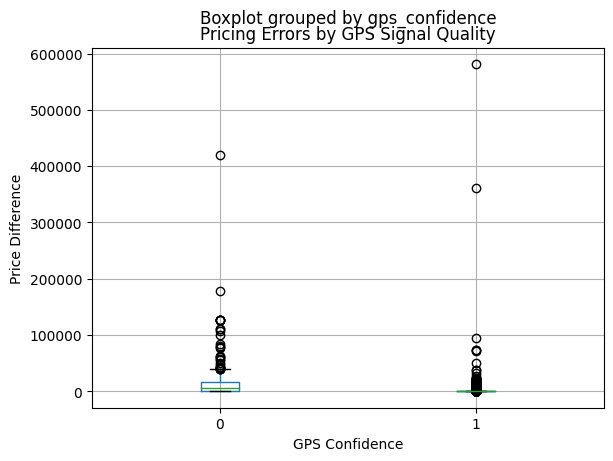

In [72]:
plt.figure(figsize=(8, 5))  # Adjust figure size if needed
df.boxplot(column='price_difference', by='gps_confidence')

plt.title('Pricing Errors by GPS Signal Quality')
plt.ylabel('Price Difference')
plt.xlabel('GPS Confidence')
plt.show()


# **11. Destination Changes**




###***11.1) Line Chart showcasing how the average price discrepancy increases as the number of destination changes goes up.***

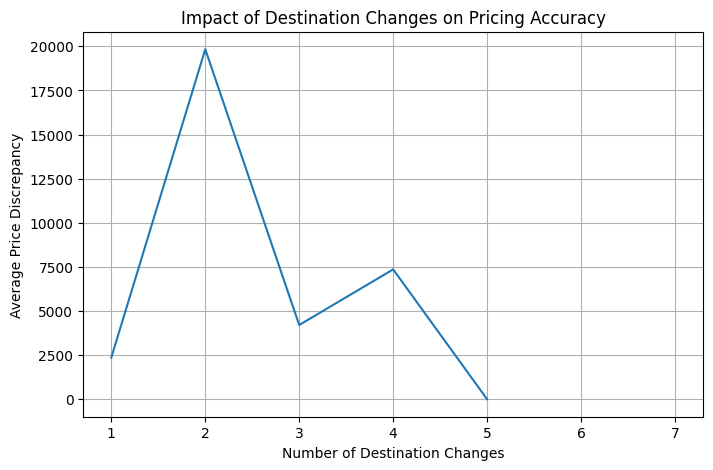

In [73]:
# Calculating average price discrepancy by number of changes
df_grouped = df.groupby('dest_change_number')['price_difference'].mean()

# Plotting the same
plt.figure(figsize=(8, 5))
plt.plot(df_grouped.index, df_grouped.values)

plt.xlabel('Number of Destination Changes')
plt.ylabel('Average Price Discrepancy')
plt.title('Impact of Destination Changes on Pricing Accuracy')
plt.grid(True)
plt.show()


###***11.2) Checking if my analysis found a threshold**

In [74]:
import pandas as pd

for i in range(1, df_grouped.index.max()):
    before_change = df_grouped.iloc[:i].mean()  # Average discrepancy before 'i' changes
    after_change = df_grouped.iloc[i:].mean()  # Average discrepancy after 'i' changes

    # Check for significant increase
    if abs(after_change - before_change) > 0.2 * before_change:
        print(f"Pricing accuracy significantly decreased after more than {i} destination changes.")
        break  # Stopping the loop once threshold is found


Pricing accuracy significantly decreased after more than 1 destination changes.


### **11.3) How much % of users face more than 20% Fluctuation in Upfront Prices**

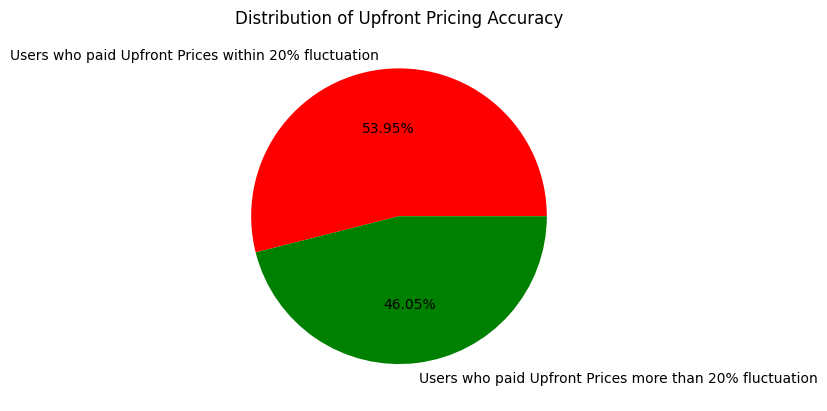

In [75]:
counts = df_required_columns.groupby('Surprise_factor').size()

labels = ['Users who paid Upfront Prices within 20% fluctuation',
          'Users who paid Upfront Prices more than 20% fluctuation']

colors = ['red', 'green']

plt.pie(counts, labels=labels, colors=colors, autopct='%.2f%%')
plt.title('Distribution of Upfront Pricing Accuracy')
plt.show()